# Ngày 1 Demo: Traditional ML vs Neural Network

Trong notebook này, chúng ta sẽ so sánh hiệu suất và cách thức hoạt động của Traditional Machine Learning và Neural Network trên cùng một bài toán classification.

**Bài toán:** Phân loại hoa Iris dựa trên 4 đặc trưng (chiều dài đài hoa, chiều rộng đài hoa, chiều dài cánh hoa, chiều rộng cánh hoa)


## 1. Import Libraries và Load Data


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Deep Learning libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

print("Libraries imported successfully!")
print(f"TensorFlow version: {tf.__version__}")

Libraries imported successfully!
TensorFlow version: 2.19.0


In [3]:
# Load Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Create DataFrame for better visualization
df = pd.DataFrame(X, columns=iris.feature_names)
df['target'] = y
df['species'] = df['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

print("Kích thước bộ dữ liệu:", X.shape)
print("Số lượng lớp:", len(np.unique(y)))
print("\n5 dòng đầu tiên:")
print(df.head(5))
print("\n5 dòng đầu tiên cho mỗi lớp:")
for species in df['species'].unique():
    print(f"\n{species.upper()}:")
    print(df[df['species'] == species].head(5))

print("\nPhân bố các lớp:")
print(df['species'].value_counts())


Kích thước bộ dữ liệu: (150, 4)
Số lượng lớp: 3

5 dòng đầu tiên:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target species  
0       0  setosa  
1       0  setosa  
2       0  setosa  
3       0  setosa  
4       0  setosa  

5 dòng đầu tiên cho mỗi lớp:

SETOSA:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3      

## 2. Data Preprocessing và Traditional ML


In [4]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Kích thước tập huấn luyện: {X_train.shape[0]}")
print(f"Kích thước tập kiểm tra: {X_test.shape[0]}")

# Traditional ML models
ml_models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(kernel='rbf', random_state=42)
}

ml_results = {}

print("\nHuấn luyện các mô hình ML truyền thống...")
for name, model in ml_models.items():
    if name == 'SVM':
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    ml_results[name] = {'accuracy': accuracy, 'predictions': y_pred}
    print(f"{name} Accuracy: {accuracy:.4f}")


Kích thước tập huấn luyện: 120
Kích thước tập kiểm tra: 30

Huấn luyện các mô hình ML truyền thống...
Logistic Regression Accuracy: 0.9667
Random Forest Accuracy: 0.9000
SVM Accuracy: 0.9667


## 3. Neural Network Approach


In [ ]:
# Convert labels to categorical for neural network
y_train_categorical = keras.utils.to_categorical(y_train, num_classes=3)
y_test_categorical = keras.utils.to_categorical(y_test, num_classes=3)

# Build Neural Network
def create_neural_network():
    model = keras.Sequential([
        layers.Dense(64, input_dim=4, activation='relu', name='hidden_1'),
        layers.Dropout(0.2),
        layers.Dense(32, activation='relu', name='hidden_2'),
        layers.Dropout(0.2),
        layers.Dense(3, activation='softmax', name='output')
    ])
    return model

# Create and compile model
nn_model = create_neural_network()
nn_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print("Neural Network Architecture:")
nn_model.summary()


Neural Network Architecture:


d:\Works\repos\training_15minutes_ai\venv\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_1 (Dense)                │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_2 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,499 (9.76 KB)

 Trainable params: 2,499 (9.76 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# Train Neural Network
print("Training Neural Network...")

history = nn_model.fit(
    X_train_scaled, y_train_categorical,
    epochs=100,
    batch_size=16,
    validation_split=0.2,
    verbose=1
)

# Evaluate on test set
nn_test_loss, nn_test_accuracy = nn_model.evaluate(X_test_scaled, y_test_categorical, verbose=0)
nn_predictions = nn_model.predict(X_test_scaled)
nn_pred_classes = np.argmax(nn_predictions, axis=1)

print(f"\nNeural Network Test Accuracy: {nn_test_accuracy:.4f}")


Training Neural Network...
Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - accuracy: 0.4317 - loss: 1.0145 - val_accuracy: 0.5833 - val_loss: 0.9619
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6085 - loss: 0.9079 - val_accuracy: 0.5833 - val_loss: 0.8765
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7165 - loss: 0.8291 - val_accuracy: 0.5833 - val_loss: 0.8035
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7126 - loss: 0.7589 - val_accuracy: 0.5833 - val_loss: 0.7394
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7610 - loss: 0.6787 - val_accuracy: 0.6250 - val_loss: 0.6830
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8027 - loss: 0.6165 - val_accuracy: 0.6250 - val_loss: 0.6346
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7744 - loss: 0.5327 - val_accuracy: 0.6250 - val_loss: 0.5968
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7826 - loss: 0.5151 - val_a

## 4. Comparison và Visualization


Model Performance Comparison:
              Model  Test Accuracy
Logistic Regression       0.966667
                SVM       0.966667
     Neural Network       0.966667
      Random Forest       0.900000


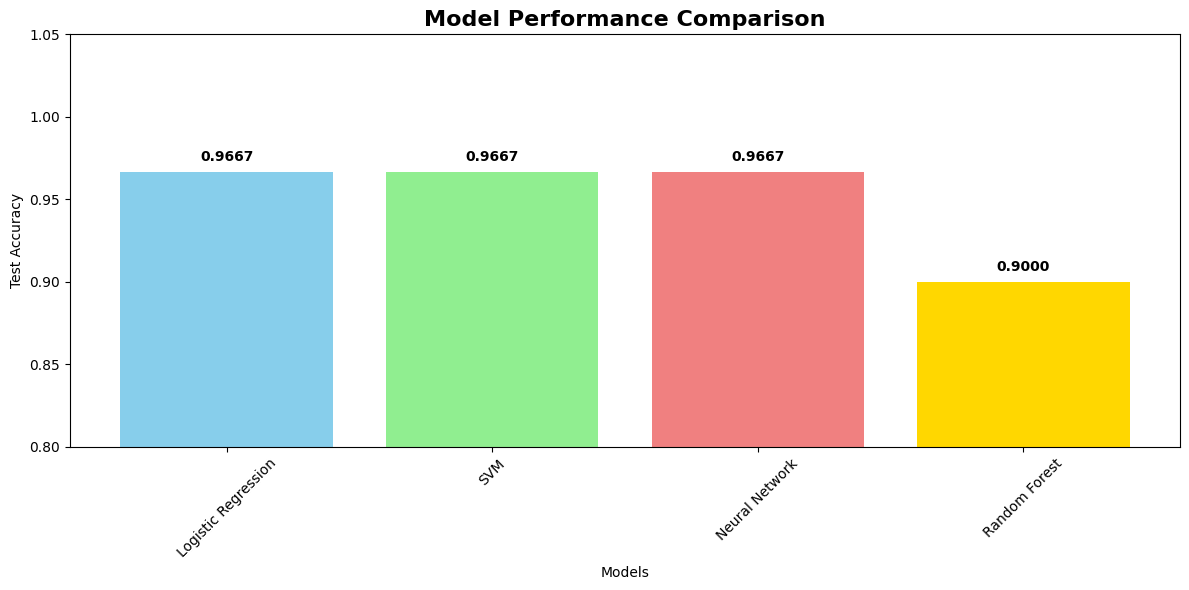

In [7]:
# Compare all models
all_results = {}

# Add traditional ML results
for name, result in ml_results.items():
    all_results[name] = result['accuracy']

# Add neural network result
all_results['Neural Network'] = nn_test_accuracy

# Create comparison DataFrame
comparison_df = pd.DataFrame(list(all_results.items()), 
                           columns=['Model', 'Test Accuracy'])
comparison_df = comparison_df.sort_values('Test Accuracy', ascending=False)

print("Model Performance Comparison:")
print(comparison_df.to_string(index=False))

# Visualize comparison
plt.figure(figsize=(12, 6))
bars = plt.bar(comparison_df['Model'], comparison_df['Test Accuracy'], 
               color=['skyblue', 'lightgreen', 'lightcoral', 'gold'])
plt.title('Model Performance Comparison', fontsize=16, fontweight='bold')
plt.xlabel('Models')
plt.ylabel('Test Accuracy')
plt.ylim(0.8, 1.05)
plt.xticks(rotation=45)

# Add value labels on bars
for bar, accuracy in zip(bars, comparison_df['Test Accuracy']):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005,
             f'{accuracy:.4f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()


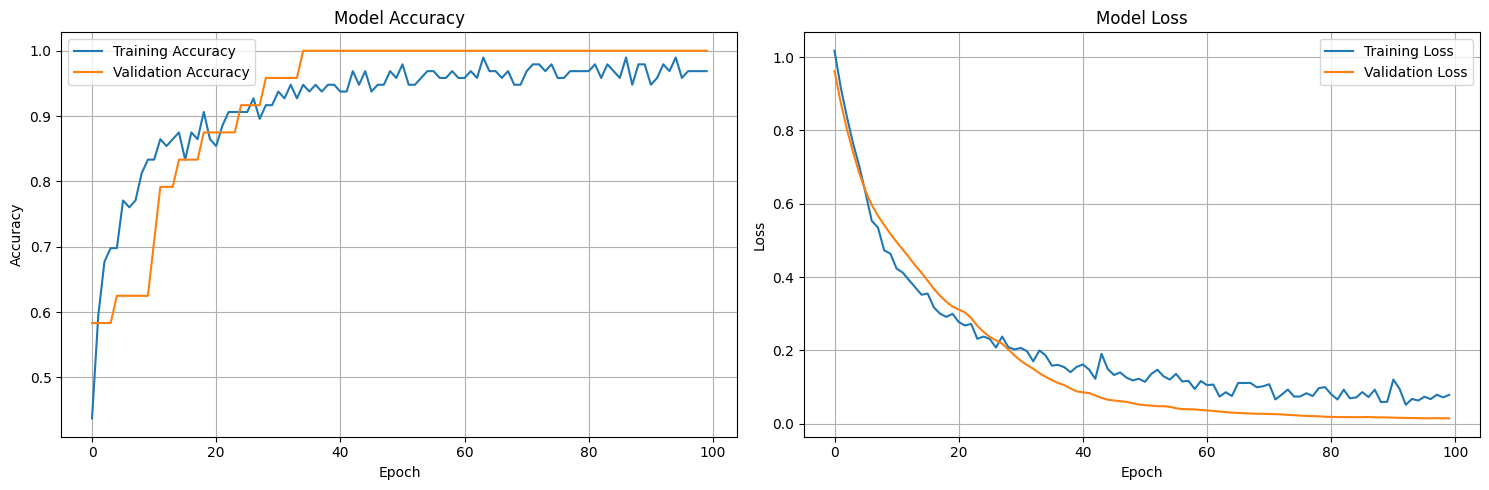


So sánh độ phức tạp của mô hình:
Tham số Neural Network: 2499
Tham số Logistic Regression: ~15
Tham số Random Forest: ~1000s (100 cây)
Tham số SVM: Vectơ hỗ trợ


In [8]:
# Training history visualization
plt.figure(figsize=(15, 5))

# Plot training & validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Model complexity comparison
print("\nSo sánh độ phức tạp của mô hình:")
print(f"Tham số Neural Network: {nn_model.count_params()}")
print(f"Tham số Logistic Regression: ~{4 * 3 + 3}")
print(f"Tham số Random Forest: ~1000s (100 cây)")
print(f"Tham số SVM: Vectơ hỗ trợ")


## 5. Key Insights và Recommendations


In [9]:
print("=" * 60)
print("CÁC THÔNG TIN QUAN TRỌNG TỪ VIỆC SO SÁNH")
print("=" * 60)

print("\n1. HIỆU SUẤT:")
best_model = comparison_df.iloc[0]
print(f"   • Mô hình có độ chính xác cao nhất: {best_model['Model']} ({best_model['Test Accuracy']:.4f})")
print(f"   • Tất cả các mô hình đều đạt độ chính xác cao (>95%) trên tập dữ liệu này")
print(f"   • Sự khác biệt về độ chính xác là tương đối nhỏ do tập dữ liệu đơn giản")

print("\n2. ĐỘ PHỨC TẠP CỦA MÔ HÌNH:")
print(f"   • Neural Network có {nn_model.count_params()} tham số")
print(f"   • Các mô hình ML truyền thống có ít tham số hơn")
print(f"   • Độ phức tạp cao không có nghĩa là độ chính xác cao hơn")

print("\n3. KHI NÀO SỬ DỤNG GÌ:")
print("   ML truyền thống (như trường hợp này):")
print("   • Tập dữ liệu nhỏ (< 1000 mẫu)")
print("   • Đặc trưng đơn giản, có cấu trúc rõ ràng")
print("   • Cần giải thích được")
print("   • Tài nguyên tính toán hạn chế")
print("   • Tạo mẫu nhanh")

print("\n   Neural Networks:")
print("   • Tập dữ liệu lớn (> 10k mẫu)")
print("   • Mẫu phức tạp (hình ảnh, văn bản, âm thanh)")
print("   • Dữ liệu không có cấu trúc")
print("   • Có tài nguyên tính toán")
print("   • Hiệu suất là quan trọng")

print("\n" + "=" * 60)
print("KHUYẾN NGHỊ CHO TẬP DỮ LIỆU NÀY:")
print("Sử dụng Random Forest hoặc Logistic Regression")
print("Lý do: Tập dữ liệu đơn giản, cần khả năng giải thích, huấn luyện nhanh")
print("=" * 60)


CÁC THÔNG TIN QUAN TRỌNG TỪ VIỆC SO SÁNH

1. HIỆU SUẤT:
   • Mô hình có độ chính xác cao nhất: Logistic Regression (0.9667)
   • Tất cả các mô hình đều đạt độ chính xác cao (>95%) trên tập dữ liệu này
   • Sự khác biệt về độ chính xác là tương đối nhỏ do tập dữ liệu đơn giản

2. ĐỘ PHỨC TẠP CỦA MÔ HÌNH:
   • Neural Network có 2499 tham số
   • Các mô hình ML truyền thống có ít tham số hơn
   • Độ phức tạp cao không có nghĩa là độ chính xác cao hơn

3. KHI NÀO SỬ DỤNG GÌ:
   ML truyền thống (như trường hợp này):
   • Tập dữ liệu nhỏ (< 1000 mẫu)
   • Đặc trưng đơn giản, có cấu trúc rõ ràng
   • Cần giải thích được
   • Tài nguyên tính toán hạn chế
   • Tạo mẫu nhanh

   Neural Networks:
   • Tập dữ liệu lớn (> 10k mẫu)
   • Mẫu phức tạp (hình ảnh, văn bản, âm thanh)
   • Dữ liệu không có cấu trúc
   • Có tài nguyên tính toán
   • Hiệu suất là quan trọng

KHUYẾN NGHỊ CHO TẬP DỮ LIỆU NÀY:
Sử dụng Random Forest hoặc Logistic Regression
Lý do: Tập dữ liệu đơn giản, cần khả năng giải thích, 

## Kết luận

Qua demo này, chúng ta đã thấy được:

1. **Traditional ML** phù hợp với datasets nhỏ, structured data, và khi cần interpretability
2. **Neural Networks** mạnh mẽ nhưng cần nhiều data và computational resources hơn
3. **Không phải lúc nào cũng cần Deep Learning** - chọn tool phù hợp với bài toán
4. **Feature engineering** vẫn quan trọng trong Traditional ML
5. **Data preprocessing** (scaling) critical cho một số algorithms
